In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import time
import pickle
import numpy as np

In [3]:
model_name = "../../models/RandomForest_3"
data_file = "../../data/processed_data_2.csv"

In [4]:
data = pd.read_csv(data_file)

for column in data:
    if column in ["bhk","status","house_type","new"]:
        # Get the value counts for the column
        value_counts = data[column].value_counts()
        # Find the values that occur fewer than 10 times
        to_drop = value_counts[value_counts < 10].index
        # Drop rows where the column's value is in the to_drop list
        data = data[~data[column].isin(to_drop)]
for column in data:
    if column in ["bhk","status","house_type","new"]:
        print("Column Name: ", column)
        print(data[column].unique())
        print(data[column].value_counts())

Column Name:  bhk
[ 2  1  3  4  8  5  6  9 10  7]
bhk
2     20154
1     16596
3      7278
4      1103
5       162
6        39
7         5
8         2
9         2
10        2
Name: count, dtype: int64
Column Name:  status
[1 0]
status
0    26904
1    18428
Name: count, dtype: int64
Column Name:  house_type
[0 2 1 3]
house_type
0    44580
2      597
3      110
1       45
Name: count, dtype: int64
Column Name:  new
[0 1]
new
1    27140
0    18192
Name: count, dtype: int64
Column Name:  bhk
[2 1 3 4 5 6]
bhk
2    20154
1    16596
3     7278
4     1103
5      162
6       39
Name: count, dtype: int64
Column Name:  status
[1 0]
status
0    26904
1    18428
Name: count, dtype: int64
Column Name:  house_type
[0 2 1 3]
house_type
0    44580
2      597
3      110
1       45
Name: count, dtype: int64
Column Name:  new
[0 1]
new
1    27140
0    18192
Name: count, dtype: int64


In [5]:
def preprocessing(data:pd.DataFrame) -> pd.DataFrame:
    data.drop(["status","new","house_type"], axis = 1, inplace = True)
    data = data.dropna()
    return data

In [6]:
processed_data = preprocessing(data)
for column in processed_data:
    print(column)

bhk
area
price_in_USD
region_Agripada
region_Airoli
region_Ambernath East
region_Ambernath West
region_Andheri East
region_Andheri West
region_Anjurdive
region_Badlapur East
region_Badlapur West
region_Bandra East
region_Bandra Kurla Complex
region_Bandra West
region_Belapur
region_Bhandup East
region_Bhandup West
region_Bhayandar East
region_Bhayandar West
region_Bhiwandi
region_Boisar
region_Borivali East
region_Borivali West
region_Byculla
region_Chembur
region_Colaba
region_Dadar East
region_Dadar West
region_Dahisar
region_Deonar
region_Diva
region_Dombivali
region_Dronagiri
region_Ghansoli
region_Ghatkopar East
region_Ghatkopar West
region_Girgaon
region_Goregaon East
region_Goregaon West
region_Jogeshwari East
region_Jogeshwari West
region_Juhu
region_Juinagar
region_Kalamboli
region_Kalwa
region_Kalyan East
region_Kalyan West
region_Kamothe
region_Kandivali East
region_Kandivali West
region_Kanjurmarg
region_Karanjade
region_Karjat
region_Kasheli
region_Khar
region_Kharghar
reg

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = processed_data.drop(labels="price_in_USD",axis=1)
for column in X:
    if column in ["locality","region", "status", "age","type"]:
        X[column] = le.fit_transform(X[column])

Y = processed_data["price_in_USD"]
print(X.shape)
print(Y.shape)

(45332, 111)
(45332,)


In [8]:
from sklearn.model_selection import train_test_split
X_hold, X_test, Y_hold, Y_test = train_test_split(X,Y,test_size=0.1,random_state=0)
X_train, X_val, Y_train,Y_val = train_test_split(X_hold,Y_hold,test_size=0.1,random_state=0)

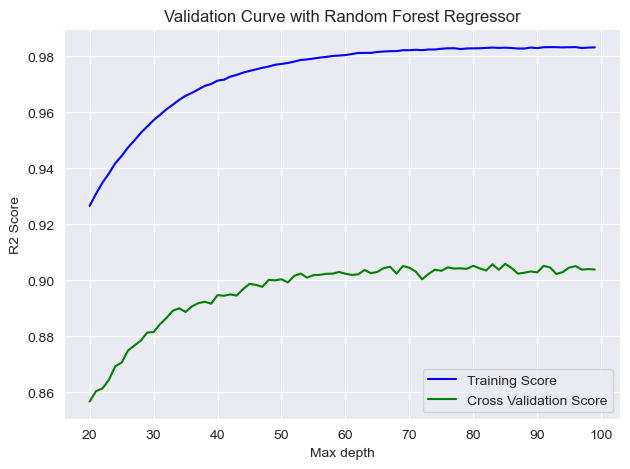

In [9]:
from sklearn.model_selection import validation_curve

parameter_range = np.arange(20, 100, 1)

# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, val_score = validation_curve(RandomForestRegressor(n_estimators=10, random_state=42), X_hold, Y_hold,
                                          param_name="max_depth",
                                          param_range=parameter_range,
                                          cv=4, scoring="r2")
mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1)

mean_val_score = np.mean(val_score, axis=1)
std_val_score = np.std(val_score, axis=1)

plt.plot(parameter_range, mean_train_score,
         label="Training Score", color='b')
plt.plot(parameter_range, mean_val_score,
         label="Cross Validation Score", color='g')
# Creating the plot
plt.title("Validation Curve with Random Forest Regressor")
plt.xlabel("Max depth")
plt.ylabel("R2 Score")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [10]:
from sklearn.model_selection import validation_curve

parameter_range = ["squared_error","absolute_error","friedman_mse", "poisson"]

# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, val_score = validation_curve(RandomForestRegressor(n_estimators=10, max_depth=20, random_state=42), X_hold, Y_hold,
                                          param_name="criterion",
                                          param_range=parameter_range,
                                          cv=4, scoring="r2")
mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1)

mean_val_score = np.mean(val_score, axis=1)
std_val_score = np.std(val_score, axis=1)

plt.plot(parameter_range, mean_train_score,
         label="Training Score", color='b')
plt.plot(parameter_range, mean_val_score,
         label="Cross Validation Score", color='g')
# Creating the plot
plt.title("Validation Curve with Random Forest Regressor")
plt.xlabel("Criterion")
plt.ylabel("R2 Score")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [11]:
from sklearn.model_selection import validation_curve

parameter_range = np.arange(700 , 800, 2)

# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, val_score = validation_curve(RandomForestRegressor(n_estimators=10, max_depth=16, random_state=42), X_hold, Y_hold,
                                          param_name="max_leaf_nodes",
                                          param_range=parameter_range,
                                          cv=4, scoring="r2")
mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1)

mean_val_score = np.mean(val_score, axis=1)
std_val_score = np.std(val_score, axis=1)

plt.plot(parameter_range, mean_train_score,
         label="Training Score", color='b')
plt.plot(parameter_range, mean_val_score,
         label="Cross Validation Score", color='g')
# Creating the plot
plt.title("Validation Curve with Random Forest Regressor")
plt.xlabel("Max leaf nodes")
plt.ylabel("R2 Score")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

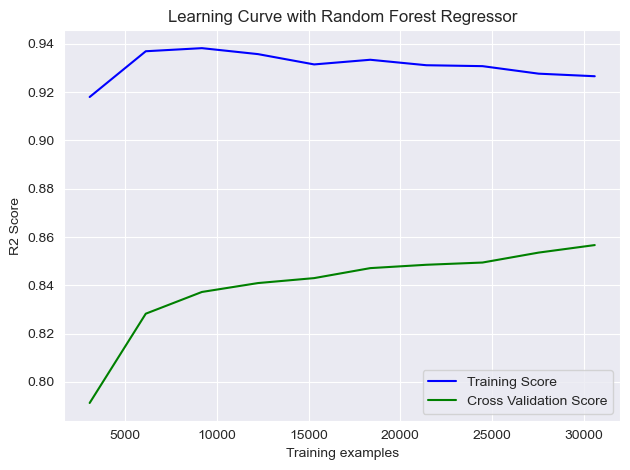

In [20]:
from sklearn.model_selection import learning_curve

# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_sizes, train_score, val_score = learning_curve(RandomForestRegressor(n_estimators=10,max_depth=20, random_state=42), X_hold, Y_hold,
                                          cv=4, train_sizes=np.linspace(0.1, 1.0, 10),scoring="r2")

train_score_mean = np.mean(train_score, axis=1)
train_score_std = np.std(train_score, axis=1)

val_score_mean = np.mean(val_score, axis=1)
val_score_std = np.std(val_score, axis=1)

plt.plot(train_sizes, train_score_mean,
         label="Training Score", color='b')
plt.plot(train_sizes, val_score_mean,
         label="Cross Validation Score", color='g')
# Creating the plot
plt.title("Learning Curve with Random Forest Regressor")
plt.xlabel("Training examples")
plt.ylabel("R2 Score")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [28]:
start = time.time()
# Create the model
model = RandomForestRegressor(n_estimators=10, max_depth=110 , random_state=42)
print("Start training...")
model.fit(X_train, Y_train)
end = time.time()
print("Time execution : ", end - start)
pickle.dump(model, open(model_name, 'wb'))

Start training...
Time execution :  6.254915952682495


In [29]:
loaded_model = pickle.load(open(model_name, 'rb'))

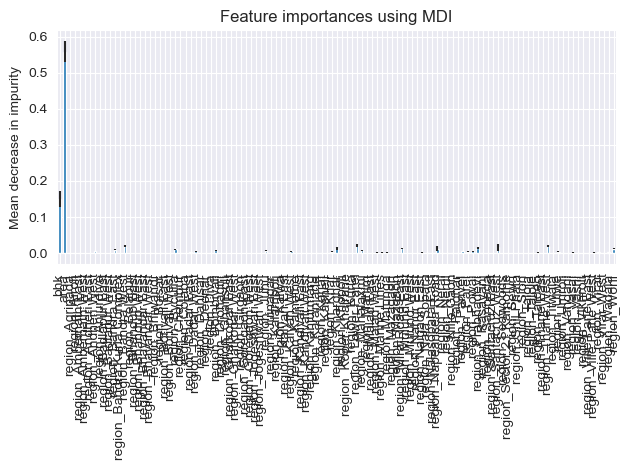

In [30]:
feature_names = [f"{column}" for column in X_train]
importances = loaded_model.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in loaded_model.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [31]:
#Make the predictions 
pred_table = pd.DataFrame(data={"actual value":Y_test, "predicted":loaded_model.predict(X_test)})
pred_table["difference"] = pred_table["actual value"] - pred_table["predicted"]
pred_table

,actual value,predicted,difference
14948,92400.0,88174.754193,4225.245807
19778,120000.0,125160.000000,-5160.000000
27087,45600.0,38909.514286,6690.485714
14980,114000.0,116625.000000,-2625.000000
32008,226800.0,223800.000000,3000.000000
...,...,...,...
25783,86400.0,67819.800000,18580.200000
31762,120000.0,120000.000000,0.000000
42984,144000.0,108600.000000,35400.000000
18282,198000.0,159036.000000,38964.000000


In [32]:
from sklearn.metrics import r2_score
#Test the model
pred_train = loaded_model.predict(X_train)
pred_val = loaded_model.predict(X_val)
pred_test = loaded_model.predict(X_test)
train_accuracy = r2_score(pred_train, Y_train)
val_accuracy = r2_score(pred_val, Y_val)
test_accuracy = r2_score(pred_test, Y_test)
print('Training accuracy: ',train_accuracy)
print('Validation accuracy: ', val_accuracy)
print('Test accuracy: ',test_accuracy)

Training accuracy:  0.9854614163704767
Validation accuracy:  0.9378851022256589
Test accuracy:  0.9396483762111695


In [33]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(Y_train, pred_train)
mse_val = mean_squared_error(Y_val, pred_val)
mse_test = mean_squared_error(Y_test, pred_test)
print('Training mean squared error: ', mse_train)
print('Validation mean squared error: ', mse_val)
print('Test mean squared error: ', mse_test)

Training mean squared error:  589842199.0985742
Validation mean squared error:  2085354206.7831872
Test mean squared error:  1982471769.9694228


In [34]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(Y_train, pred_train)
mae_val = mean_absolute_error(Y_val, pred_val)
mae_test = mean_absolute_error(Y_test, pred_test)
print('Training mean absolute error: ', mae_train)
print('Validation mean absolute error: ', mae_val)
print('Test mean absolute error: ', mae_test)

Training mean absolute error:  11344.40632264249
Validation mean absolute error:  18702.51706557329
Test mean absolute error:  18679.811492442514
